In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
dataset = pd.read_csv('dataset.csv')
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


In [17]:
import random

N = 10000  # total number of ad displays (rounds)
d = 10     # number of ads

summ = 0  # total reward
selected = []  # list to track selected ads
one_count = [0] * d  # number of 1 rewards per ad
zero_count = [0] * d # number of 0 rewards per ad

for n in range(1, N):
    ad = 0
    max_th = 0
    
    # Loop over each ad and sample from Beta distribution
    for i in range(0, d):
        # Correct Beta parameters: successes (1s) and failures (0s)
        ranbeta = random.betavariate(one_count[i] + 1, zero_count[i] + 1)
        if ranbeta > max_th:
            max_th = ranbeta
            ad = i

    selected.append(ad)

    # Get reward from dataset
    prize = dataset.values[n, ad]
    
    # Update reward counts
    if prize == 1:
        one_count[ad] += 1
    else:
        zero_count[ad] += 1
    
    # Update total reward
    summ += prize


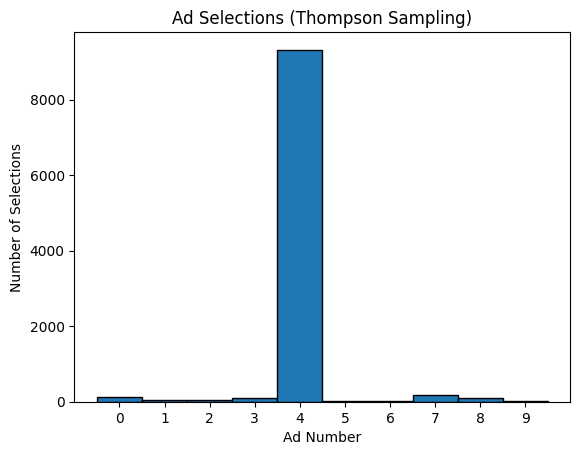

In [18]:
import matplotlib.pyplot as plt

plt.hist(selected, bins=range(11), edgecolor='black', align='left')
plt.title("Ad Selections (Thompson Sampling)")
plt.xlabel("Ad Number")
plt.ylabel("Number of Selections")
plt.xticks(range(d))
plt.show()


In [20]:
print('Total Prize')
print(summ)

Total Prize
2608
